# Data Exploring

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
import os
import seaborn as sns

In [3]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

In [3]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [28]:
print(train.info(),'\n',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
<class 'pandas.core.frame.D

In [29]:
print(train.isnull().sum(),'\n',test.isnull().sum())

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64 
 id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device

In [33]:
print(train.shape,test.shape)

(213451, 16) (62096, 15)


AttributeError: 'NoneType' object has no attribute 'value_counts'

## Explore Each Feature

### date_account_created

In [42]:
dac_train=train.date_account_created.value_counts()
dac_test=test.date_account_created.value_counts()
print('train.date_account_created:',
      dac_train.describe(),
      'test.date_account_created:\n',
      dac_test.describe())

train.date_account_created: count    1634.000000
mean      130.630967
std       139.327895
min         1.000000
25%        15.000000
50%        79.000000
75%       201.000000
max       674.000000
Name: date_account_created, dtype: float64 test.date_account_created:
 count      92.000000
mean      674.956522
std       122.568116
min       401.000000
25%       606.750000
50%       662.000000
75%       739.000000
max      1105.000000
Name: date_account_created, dtype: float64


In [58]:
dac_train_data=pd.to_datetime(dac_train.index)
dac_test_data=pd.to_datetime(dac_test.index)

dac_train_day=dac_train_data-dac_train_data.min()
dac_test_day=dac_test_data-dac_train_data.min()

print(dac_train_day,'\n',dac_test_day)

TimedeltaIndex(['1593 days', '1635 days', '1636 days', '1600 days',
                '1594 days', '1614 days', '1601 days', '1627 days',
                '1622 days', '1608 days',
                ...
                  '18 days',    '1 days',    '2 days',   '67 days',
                  '30 days',    '7 days',  '168 days',   '22 days',
                   '0 days',   '27 days'],
               dtype='timedelta64[ns]', length=1634, freq=None) 
 TimedeltaIndex(['1664 days', '1663 days', '1658 days', '1665 days',
                '1659 days', '1662 days', '1699 days', '1698 days',
                '1670 days', '1678 days', '1671 days', '1684 days',
                '1683 days', '1677 days', '1700 days', '1669 days',
                '1657 days', '1666 days', '1672 days', '1719 days',
                '1686 days', '1691 days', '1713 days', '1679 days',
                '1680 days', '1661 days', '1685 days', '1706 days',
                '1676 days', '1697 days', '1727 days', '1660 days',
             

In [59]:
dac_train_day.days

Int64Index([1593, 1635, 1636, 1600, 1594, 1614, 1601, 1627, 1622, 1608,
            ...
              18,    1,    2,   67,   30,    7,  168,   22,    0,   27],
           dtype='int64', length=1634)

Text(0.5, 1.0, 'Accounts created vs day')

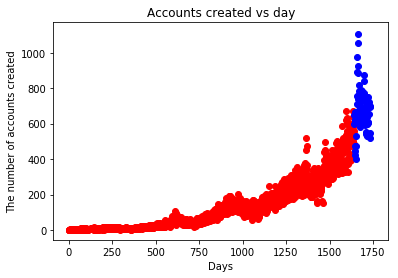

In [89]:
plt.scatter(dac_train_day.days,dac_train.values,color='r',label='train_datasets')
plt.scatter(dac_test_day.days,dac_test.values,color='b',label='test_datasets')
plt.xlabel("Days")
plt.ylabel("The number of accounts created")
plt.title('Accounts created vs day')

### timestamp_first_active

In [93]:
tfa_train=train.timestamp_first_active.map(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d%H%M%S'))
tfa_train.head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

In [92]:
tfa_train.describe()

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object

### age

[87990, 57, 122861, 2543] [28876, 2, 32833, 385] ['Null', 'age<15', 'age', 'age>90']


Text(0, 0.5, 'counts')

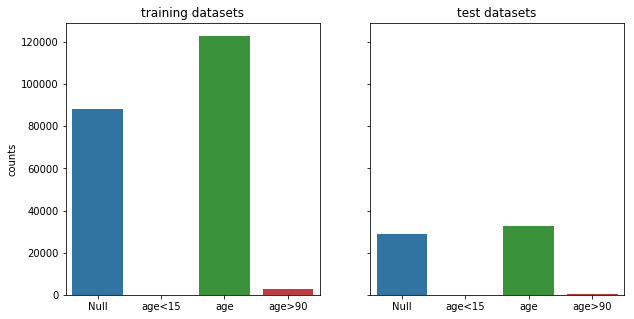

In [103]:
    age_train=[train.isnull().age.sum(),
               train.query('age<15').age.shape[0],
               train.query('age>=15&age<=90').age.shape[0],
               train.query('age>90').age.shape[0]]
    age_test=[test.isnull().age.sum(),
              test.query('age<15').age.shape[0],
              test.query('age>=15&age<=90').age.shape[0],
              test.query('age>90').age.shape[0]]
    columns=['Null','age<15','age','age>90']
    print(age_train,age_test,columns)

    fig,(ax1,ax2)=plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,5))
    sns.barplot(columns,age_train,ax=ax1)
    sns.barplot(columns,age_test,ax=ax2)
    ax1.set_title('training datasets')
    ax2.set_title('test datasets')
    ax1.set_ylabel('counts')

### Categorical features

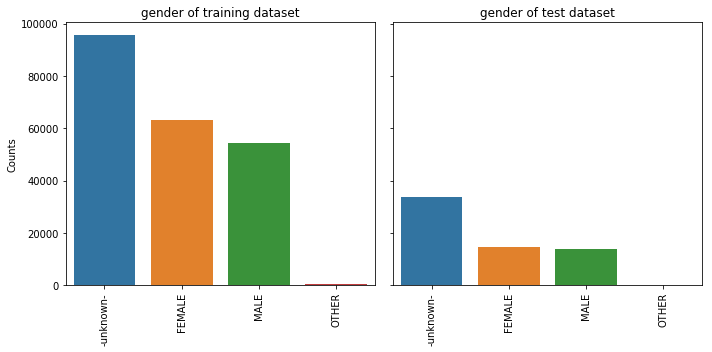

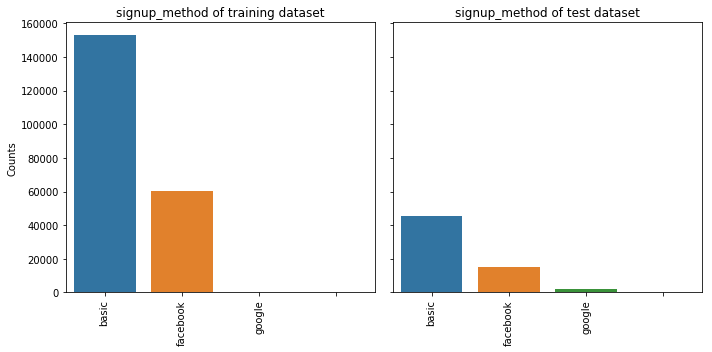

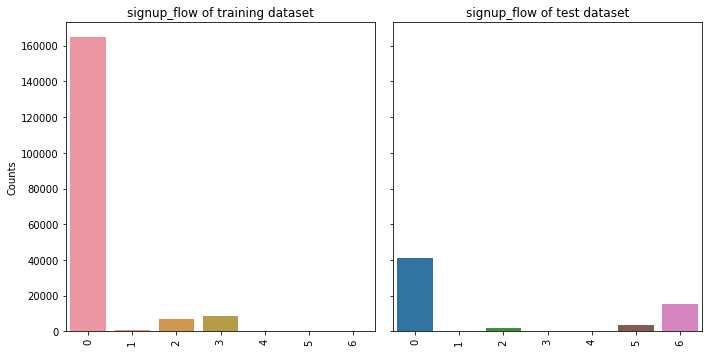

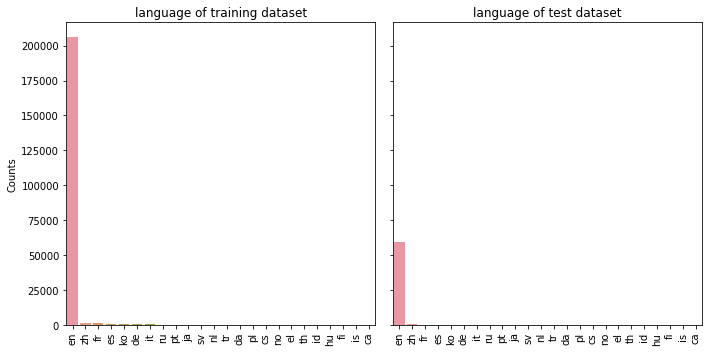

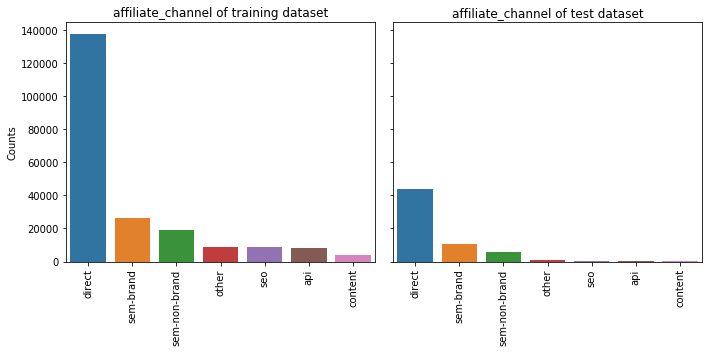

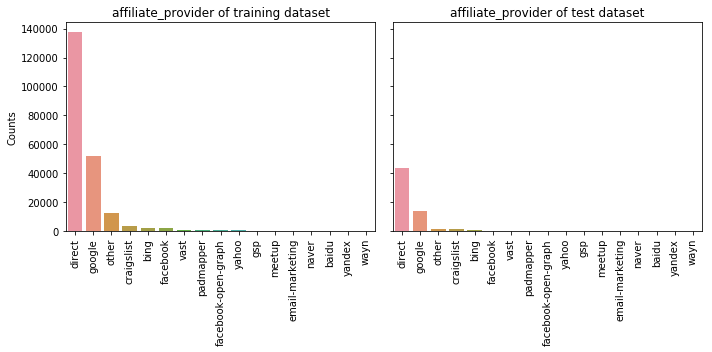

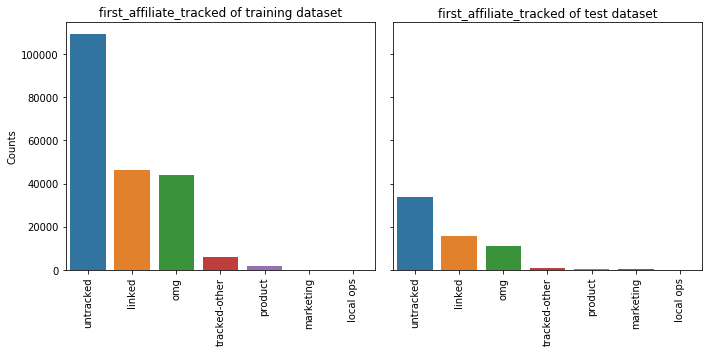

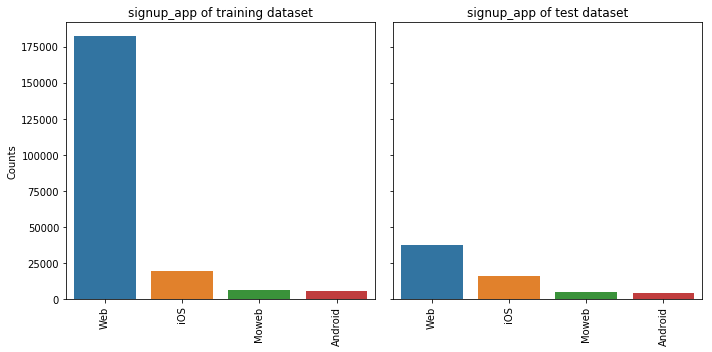

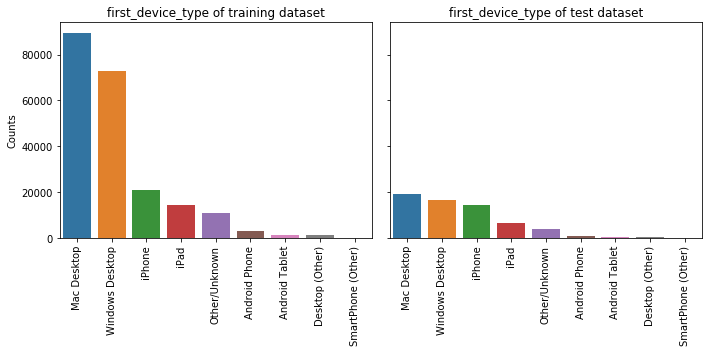

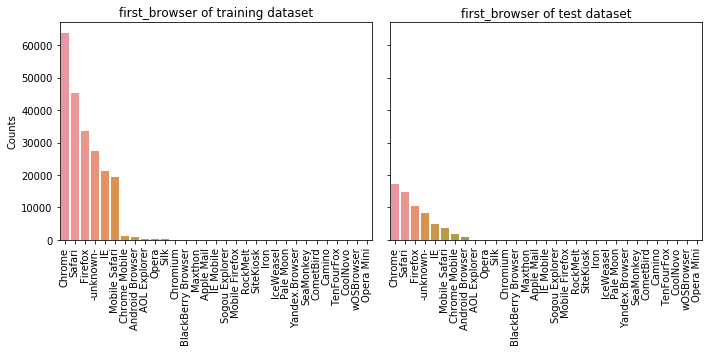

In [104]:
cate_feats = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']

def feature_barplot(feature, df_train = train, df_test = test, figsize=(10,5), rot = 90, saveimg = False):
    
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()
    
    fig_feature, (axis1,axis2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)

    sns.barplot(feat_train.index.values, feat_train.values, ax = axis1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = axis2)
    
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis2.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)

    axis1.set_title(feature + ' of training dataset')
    axis2.set_title(feature + ' of test dataset')
    axis1.set_ylabel('Counts')
    
    plt.tight_layout()
    
for feat in cate_feats:
    feature_barplot(feature = feat)

# Featur Enginnering

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
#import pickle
import datetime
from datetime import date
#import os
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
%matplotlib inline